In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string


In [38]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [39]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\foksa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
"""
 Considering the text could be english or ukrainian, we modify  english stopwords by adding ukrainian words.
 After analysing text with nltk i created file with additional stopwords.We add them too
"""
def create_custom_stop_words():
    with open('stopwords_ua.txt', 'r', encoding='utf-8') as file:
        ukrainian_stop_words = [line.strip() for line in file.readlines()]
    with open('my_custom_stopwords.txt', 'r', encoding='utf-8') as file:
        custom_stop_words = [line.strip() for line in file.readlines()]

    modified_stop_words = nltk.corpus.stopwords.words('english')
    modified_stop_words.extend(ukrainian_stop_words)
    modified_stop_words.extend(custom_stop_words)
    return modified_stop_words

In [41]:
modified_stop_words = create_custom_stop_words()

In [42]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation, returns list of char
    unwanted_chars = string.punctuation + '’—–1234567890'
    nopunc = [char for char in mess if char not in unwanted_chars]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return " ".join([word for word in nopunc.split() if word.lower() not in modified_stop_words])

In [43]:
#Function takes string and return most common words
def get_most_popular(all_text: str, quantity: int):
    allWords = nltk.tokenize.word_tokenize(all_text)
    allWordDist = nltk.FreqDist(w.lower() for w in allWords)
    return allWordDist.most_common(quantity)
        

In [52]:
#Function that takes dataframe and create bar plot with it data
def draw_plot(tech):
    plt.figure(figsize=(12,8))
    tech.plot(kind="bar", x = "Technology", y="Frequency", )
    plt.xlabel("Technology")
    plt.ylabel("Frequency")
    plt.title("The most demanded technologies")
    plt.show()

In [53]:
#Create a function that open csv file and draw a plot after checking if it all works 
def main():
    df = pd.read_csv("description.csv")
    df["text_without_stopwords"]= df["description"].apply(text_process)
    all_text = "".join(df["text_without_stopwords"])
    mostCommon = get_most_popular(all_text, 20)
    tech = pd.DataFrame(mostCommon, columns=['Technology', 'Frequency'])
    draw_plot(tech)


<Figure size 1200x800 with 0 Axes>

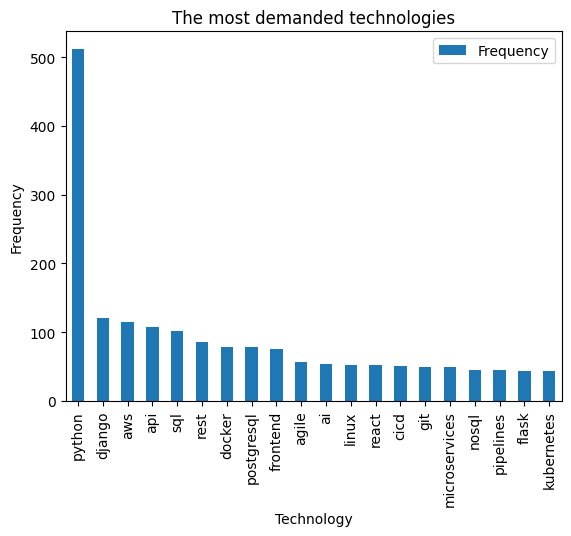

In [54]:
main()